<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>


# LinkedIn - Follow Total Content Views


**Tags:** #linkedin #html #plotly #csv #image #content #analytics #automation


**Author:** [Sanjeet Attili](https://www.linkedin.com/in/sanjeet-attili-760bab190/)

With this notebook, you can see the evolution the number of views on your content published on LinkedIn on your personal profile, cumulated, daily since first activity.


## Input


### Import libraries


In [70]:
from naas_drivers import linkedin
import naas
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

### Setup LinkedIn

- [Get your cookies](/d20a8e7e508e42af8a5b52e33f3dba75)


In [73]:
# Lindekin cookies
LI_AT = "AQEDARCNSioDe6wmAAABfqF-HR4AAAF-xYqhHlYAtSu7EZZEpFer0UZF-GLuz2DNSz4asOOyCRxPGFjenv37irMObYYgxxxxxxx"
JSESSIONID = "ajax:12XXXXXXXXXXXXXXXXX"

# Enter profile URL
PROFILE_URL = "PROFILE_URL"

### Setup Outputs


In [40]:
# Outputs
name_output = "My_output"
csv_output = f"{name_output}.csv"
html_output = f"{name_output}.html"
image_output = f"{name_output}.png"


### Setup Naas


In [ ]:
# Schedule your notebook everyday at 9:00 AM
naas.scheduler.add(cron="0 9 * * *")

#-> Uncomment the line below to remove your scheduler
# naas.scheduler.delete()


## Model


### Get posts feed


In [80]:
# Get posts feed from CSV stored in your local (Returns empty if CSV does not exist)
def get_past_feeds(csv_output):
    try:
        df = pd.read_csv(csv_output)
    except FileNotFoundError as e:
        # Empty dataframe returned
        return pd.DataFrame()
    return df

df_posts_feed = get_past_feeds(csv_output)
df_posts_feed

,ACTIVITY_ID,PAGINATION_TOKEN,PUBLISHED_DATE,AUTHOR_NAME,SUBDESCRIPTION,TITLE,TEXT,CHARACTER_COUNT,TAGS,TAGS_COUNT,...,IMAGE_URL,POLL_ID,POLL_QUESTION,POLL_RESULTS,POST_URL,VIEWS,COMMENTS,LIKES,SHARES,ENGAGEMENT_SCORE
0,6914997731384053760,dXJuOmxpOmFjdGl2aXR5OjY5MTQ5OTc3MzEzODQwNTM3Nj...,2022-03-30 18:12:13+02:00,Sanjeet Attili,1 week ago,Greetings everyone!,Greetings everyone!\n\nI am very happy to shar...,650,#github #data #opensource #automation #joboppo...,5,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,1799,10,26,0,0.0200
1,6807686832399233024,dXJuOmxpOmFjdGl2aXR5OjY4MDc2ODY4MzIzOTkyMzMwMj...,2021-06-07 15:17:01+02:00,Sanjeet Attili,10 months ago,Someone hire this guy!,Someone hire this guy! \nhe has a great expert...,99,#spacecomplexity,1,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,0,0,2,0,0.0000
2,6805857938008350720,dXJuOmxpOmFjdGl2aXR5OjY4MDU4NTc5MzgwMDgzNTA3Mj...,2021-06-02 14:09:39+02:00,Sanjeet Attili,11 months ago,"Success has many definitions,","Success has many definitions,\nit won't be mea...",74,NaN,0,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,370,2,3,0,0.0135
3,6802928068089536512,dXJuOmxpOmFjdGl2aXR5OjY4MDI5MjgwNjgwODk1MzY1MT...,2021-05-25 12:07:23+02:00,Sanjeet Attili,11 months ago,"If you are born poor,","If you are born poor,\nit's not your mistake,\...",130,NaN,0,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,189,0,2,0,0.0106
4,6796163997369561088,dXJuOmxpOmFjdGl2aXR5OjY3OTYxNjM5OTczNjk1NjEwOD...,2021-05-06 20:09:23+02:00,Sanjeet Attili,1 year ago,*THEORY OF LIFE*,"*THEORY OF LIFE*\nWhen flood comes,\nThe fish ...",214,NaN,0,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,187,0,4,0,0.0214
5,6770033158743310336,dXJuOmxpOmFjdGl2aXR5OjY3NzAwMzMxNTg3NDMzMTAzMz...,2021-02-23 17:34:46+01:00,Sanjeet Attili,1 year ago,Success has many definitions.,Success has many definitions.\nIt won't be mea...,75,NaN,0,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,149,0,0,0,0.0000


### Get new posts


In [87]:
def get_posts(df):
    # Get last post URL in dataframe
    if len(df) == 0:
        last_post_url = None
    else:
        last_post_url = df.POST_URL[0]
    # Get new posts since last url (this part is important to optimize script performance)
    until = {}
    if last_post_url:
        until = {"POST_URL": last_post_url}

    df_posts_feed = linkedin.connect(LI_AT, JSESSIONID).profile.get_posts_feed(PROFILE_URL, until=until, limit=-1)

    # Merge dataframe
    merge_df = df.append(df_posts_feed, ignore_index=False)
    merge_df.sort_values(by = 'PUBLISHED_DATE', ascending = False, inplace=True)
    
    # Keeps/updates the latest views count value for that day
    merge_df.drop_duplicates('POST_URL', keep = 'last', inplace=True)
    
    return merge_df

merged_df = get_posts(df_posts_feed)
merged_df

,ACTIVITY_ID,PAGINATION_TOKEN,PUBLISHED_DATE,AUTHOR_NAME,SUBDESCRIPTION,TITLE,TEXT,CHARACTER_COUNT,TAGS,TAGS_COUNT,...,IMAGE_URL,POLL_ID,POLL_QUESTION,POLL_RESULTS,POST_URL,VIEWS,COMMENTS,LIKES,SHARES,ENGAGEMENT_SCORE
0,6914997731384053760,dXJuOmxpOmFjdGl2aXR5OjY5MTQ5OTc3MzEzODQwNTM3Nj...,2022-03-30 18:12:13+02:00,Sanjeet Attili,1 week ago,Greetings everyone!,Greetings everyone!\n\nI am very happy to shar...,650,#github #data #opensource #automation #joboppo...,5,...,None,None,None,None,https://www.linkedin.com/feed/update/urn:li:ac...,1800,10,26,0,0.0200
1,6807686832399233024,dXJuOmxpOmFjdGl2aXR5OjY4MDc2ODY4MzIzOTkyMzMwMj...,2021-06-07 15:17:01+02:00,Sanjeet Attili,10 months ago,Someone hire this guy!,Someone hire this guy! \nhe has a great expert...,99,#spacecomplexity,1,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,0,0,2,0,0.0000
2,6805857938008350720,dXJuOmxpOmFjdGl2aXR5OjY4MDU4NTc5MzgwMDgzNTA3Mj...,2021-06-02 14:09:39+02:00,Sanjeet Attili,11 months ago,"Success has many definitions,","Success has many definitions,\nit won't be mea...",74,NaN,0,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,370,2,3,0,0.0135
3,6802928068089536512,dXJuOmxpOmFjdGl2aXR5OjY4MDI5MjgwNjgwODk1MzY1MT...,2021-05-25 12:07:23+02:00,Sanjeet Attili,11 months ago,"If you are born poor,","If you are born poor,\nit's not your mistake,\...",130,NaN,0,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,189,0,2,0,0.0106
4,6796163997369561088,dXJuOmxpOmFjdGl2aXR5OjY3OTYxNjM5OTczNjk1NjEwOD...,2021-05-06 20:09:23+02:00,Sanjeet Attili,1 year ago,*THEORY OF LIFE*,"*THEORY OF LIFE*\nWhen flood comes,\nThe fish ...",214,NaN,0,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,187,0,4,0,0.0214
5,6770033158743310336,dXJuOmxpOmFjdGl2aXR5OjY3NzAwMzMxNTg3NDMzMTAzMz...,2021-02-23 17:34:46+01:00,Sanjeet Attili,1 year ago,Success has many definitions.,Success has many definitions.\nIt won't be mea...,75,NaN,0,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,149,0,0,0,0.0000


### Get trend


In [88]:
# Create dataframe with number of LinkedIn views cumulated by date with daily variation
# -> Empty date must be fullfiled with last value

def get_trend(posts_df):
    
    df = posts_df.copy()
    date_col_name='PUBLISHED_DATE'
    value_col_name="VIEWS"
    date_order='asc'
    
    # Format date
    for idx, item in enumerate(df['PUBLISHED_DATE']):
        df.loc[idx, 'PUBLISHED_DATE'] = item.split('+')[0]
    
    df[date_col_name] = pd.to_datetime(df[date_col_name]).dt.strftime("%Y-%m-%d")
    df = df.groupby(date_col_name, as_index=False).agg({value_col_name: "sum"})
    d = datetime.now().date()
    d2 = df.loc[df.index[0], date_col_name]
    idx = pd.date_range(d2, d, freq = "D")
    
    df.set_index(date_col_name, drop=True, inplace=True)
    df.index = pd.DatetimeIndex(df.index)
    df = df.reindex(idx, fill_value=0)
    df[date_col_name] = pd.DatetimeIndex(df.index)
    
    # Calc sum cum
    df["value_cum"] = df.agg({value_col_name: "cumsum"})
    df.drop(columns='VIEWS', inplace=True)
    return df.reset_index(drop=True)

df_trend = get_trend(merged_df)

df_trend

,PUBLISHED_DATE,value_cum
0,2021-02-23,149
1,2021-02-24,149
2,2021-02-25,149
3,2021-02-26,149
4,2021-02-27,149
...,...,...
407,2022-04-06,2695
408,2022-04-07,2695
409,2022-04-08,2695
410,2022-04-09,2695


## Output


### Display result


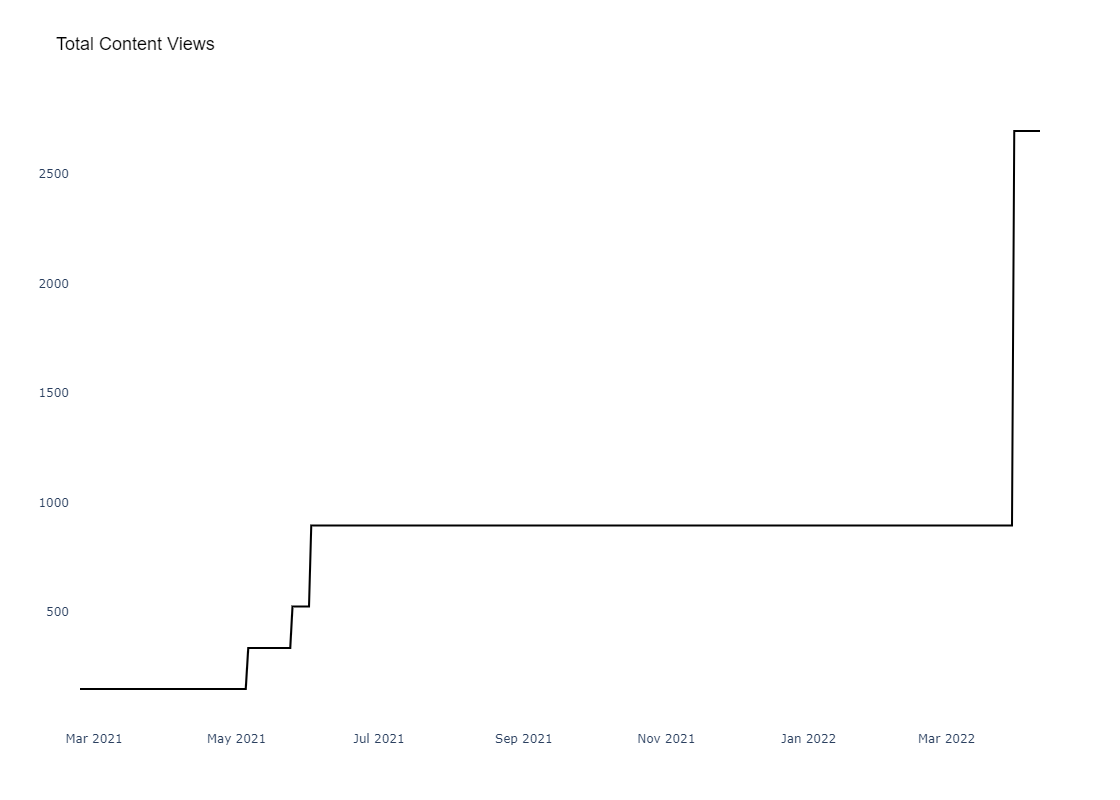

In [89]:
def create_linechart(df, label, value, title):
    
    # Init
    fig = go.Figure()
    
    # Create fig
    fig.add_trace(
        go.Scatter(
            x=df[label],
            y=df[value],
            mode="lines",
        )
    )
    fig.update_traces(marker_color='black')
    fig.update_layout(
        title=title,
        title_font=dict(family="Arial", size=18, color="black"),
        plot_bgcolor="#ffffff",
        width=1200,
        height=800,
        paper_bgcolor="white",
        margin_pad=10,
    )
    fig.show()
    return fig

fig = create_linechart(df_trend, label="PUBLISHED_DATE", value="value_cum", title='Total Content Views')


### Save and share your csv file


In [72]:
# Save your dataframe in CSV
merged_df.to_csv(csv_output, index=False)

# Share output with naas
naas.asset.add(csv_output)

#-> Uncomment the line below to remove your asset
# naas.asset.delete(csv_output)


👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/YXR0aWxpLTJFc2FuamVldDEwLTQwZ21haWwtMkVjb20=/asset/c641df0ab4c8ed8e16534632ca743d4dde188b3464923e3cb62ff41e6f12'

### Save and share your graph in HTML


In [90]:
# Save your graph in HTML
fig.write_html(html_output)

# Share output with naas
naas.asset.add(html_output, params={"inline": True})

#-> Uncomment the line below to remove your asset
# naas.asset.delete(html_output)


👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/YXR0aWxpLTJFc2FuamVldDEwLTQwZ21haWwtMkVjb20=/asset/e87cc958e3ca938f9a737cf2244f9b93dd6a978e9b1a555e98236000ee7d'

### Save and share your graph in image


In [ ]:
# Save your graph in PNG
fig.write_image(image_output)

# Share output with naas
naas.asset.add(image_output, params={"inline": True})

#-> Uncomment the line below to remove your asset
# naas.asset.delete(image_output)
